In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
pd.options.display.float_format = '{:.5f}'.format

In [3]:
df = pd.read_csv("C:\\Users\\82109\\Desktop\\kamp\\kamp\\전처리데이터/202206_RG3.csv", encoding='cp949')

In [4]:
df.tail()

,X_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Max_Injection_Speed,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature
1251,5fa23fbc9c0189cc66e44ddf,2020-11-04 5:43,2020-11-04 오전 12:00:00,10,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.07000,...,127.50000,143.00000,118.30000,57.10000,284.89999,285.70001,274.89999,265.00000,234.89999,64.50000
1252,5fa23fbd9c0189cc66e44de3,2020-11-04 5:43,2020-11-04 오전 12:00:00,9,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.07000,...,127.50000,143.00000,118.30000,57.10000,284.89999,285.70001,274.89999,265.00000,234.89999,64.50000
1253,5fa36afd9c0189cc66eebe41,2020-11-05 3:00,2020-11-05 오전 12:00:00,3,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.07000,...,128.00000,142.89999,117.20000,56.20000,284.89999,285.50000,274.39999,264.89999,235.10001,62.20000
1254,5fa36b009c0189cc66eebed7,2020-11-05 3:00,2020-11-05 오전 12:00:00,4,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.07000,...,128.00000,142.89999,117.20000,56.20000,284.89999,285.50000,274.39999,264.89999,235.10001,62.20000
1255,5fa4d0ce9c0189cc66fc7a13,2020-11-06 4:27,2020-11-06 오전 12:00:00,7,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.07000,...,127.90000,143.10001,117.30000,56.50000,285.60001,284.39999,275.50000,264.89999,234.89999,63.40000


In [5]:
df.head()

,X_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Max_Injection_Speed,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature
0,5f8f87c09c0189cc6679187a,2020-10-21 0:57,2020-10-21 오전 12:00:00,17,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.06000,...,128.50000,142.30000,115.70000,55.60000,285.00000,285.00000,275.39999,265.10001,234.89999,65.80000
1,5f8f87c09c0189cc6679187d,2020-10-21 0:57,2020-10-21 오전 12:00:00,18,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.06000,...,128.50000,142.30000,115.70000,55.60000,285.00000,285.00000,275.39999,265.10001,234.89999,65.80000
2,5f8f87c09c0189cc66791885,2020-10-21 0:56,2020-10-21 오전 12:00:00,17,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.06000,...,128.50000,142.39999,115.80000,55.70000,285.79999,285.00000,275.60001,265.60001,234.80000,65.80000
3,5f8f87c19c0189cc66791888,2020-10-21 0:56,2020-10-21 오전 12:00:00,18,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,None,1.06000,...,128.50000,142.39999,115.80000,55.70000,285.79999,285.00000,275.60001,265.60001,234.80000,65.80000
4,5f8f87c29c0189cc6679188e,2020-10-21 0:55,2020-10-21 오전 12:00:00,17,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,None,1.06000,...,128.39999,142.50000,116.00000,55.80000,285.10001,285.00000,276.00000,265.10001,234.70000,65.90000


In [6]:
df = df.drop(['X_id','TimeStamp','PART_FACT_PLAN_DATE','PART_FACT_SERIAL','PART_NAME','EQUIP_CD','EQUIP_NAME','Reason'],axis=1)

In [7]:
passorfail = df['PassOrFail']
df = df.drop(['PassOrFail'], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler


df = StandardScaler().fit_transform(df)
features = ['Injection_Time', 'Filling_Time', 'Plasticizing_Time','Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position','Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Injection_Pressure', 'Max_Switch_Over_Pressure','Max_Back_Pressure', 'Barrel_Temperature_2', 'Barrel_Temperature_3','Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6','Hopper_Temperature']
df = pd.DataFrame(df, columns=features)

In [9]:
df = df.drop(columns= 'Clamp_Open_Position') #Clamp_Open_Position의 경우 모두 같은 값을 가지기 때문에 제외

In [10]:
df = pd.concat([passorfail, df], axis=1)

In [11]:
df.loc[df['PassOrFail'] == 'N', 'PassOrFail'] = -1
df.loc[df['PassOrFail'] == 'Y', 'PassOrFail'] = 1    #추후 anomaly 값과 비교하여 ConfusionMatrix 수행하기 위함.

In [12]:
df = df.astype({'PassOrFail':'int'})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

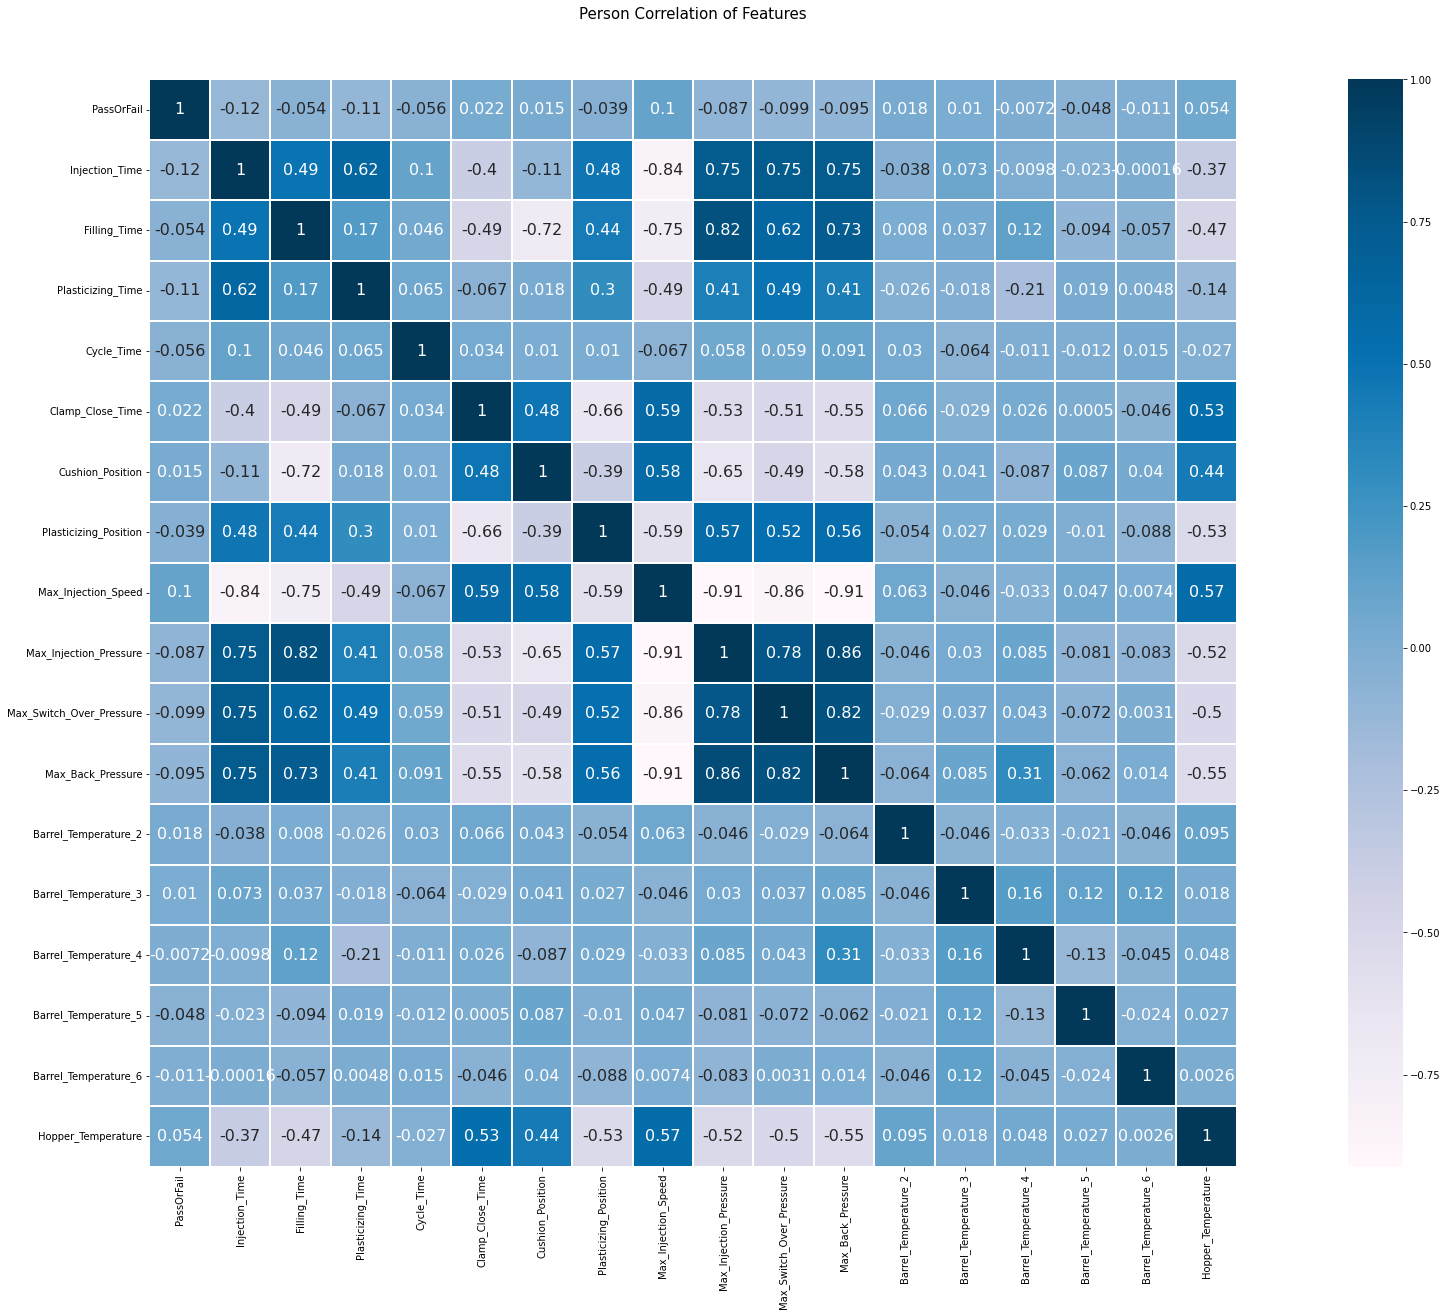

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.PuBu
plt.figure(figsize=(40, 20))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3) 
scaler = StandardScaler()

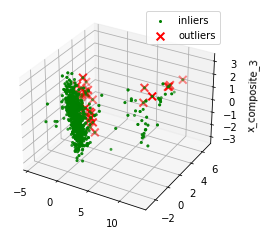

In [15]:
#normalize the metrics
X = scaler.fit_transform(df)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
outliers1=df.loc[df['PassOrFail']==-1]
outlier1_index=list(outliers1.index)
ax.scatter(X_reduce[outlier1_index,0],X_reduce[outlier1_index,1], X_reduce[outlier1_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [16]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.16169,-0.23201,-1.16630,1.17627,0.20441,1.07576,2.77685,-1.62088,1.27695,-1.59179,-0.93230,-1.00878,-0.48465,-0.01527,0.05833,0.28780,-0.35959,0.27186
1,0.16169,-0.23201,-1.16630,1.17627,0.20441,1.07576,2.77685,-1.62088,1.27695,-1.59179,-0.93230,-1.00878,-0.48465,-0.01527,0.05833,0.28780,-0.35959,0.27186
2,0.16169,-0.23201,-1.16630,0.86809,0.20441,1.07576,2.02692,-0.29452,1.27695,-1.14576,-0.80178,-0.81848,1.46949,-0.01527,0.35323,1.87035,-0.84936,0.27186
3,0.16169,-0.23201,-1.16630,0.86809,0.20441,1.07576,2.02692,-0.29452,1.27695,-1.14576,-0.80178,-0.81848,1.46949,-0.01527,0.35323,1.87035,-0.84936,0.27186
4,0.16169,-0.23201,-1.16630,0.25174,-0.29270,1.07576,1.27237,-1.62088,0.89587,-0.69966,-0.54076,-0.62818,-0.24037,-0.01527,0.94297,0.28780,-1.33920,0.36669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,0.16169,2.65324,0.61146,2.87124,0.20441,-1.60513,-0.23670,1.69489,-2.53357,1.53072,2.46105,1.84574,-0.72894,2.11581,-0.67886,-0.02873,-0.35959,-0.96084
1252,0.16169,2.65324,0.61146,2.87124,0.20441,-1.60513,-0.23670,1.69489,-2.53357,1.53072,2.46105,1.84574,-0.72894,2.11581,-0.67886,-0.02873,-0.35959,-0.96084
1253,0.16169,2.65324,0.61146,0.40583,0.20441,-1.60513,1.27237,5.67372,-0.62831,1.08462,1.02540,0.13303,-0.72894,1.50690,-1.41606,-0.34526,0.62009,-3.14177
1254,0.16169,2.65324,0.61146,0.40583,0.20441,-1.60513,1.27237,5.67372,-0.62831,1.08462,1.02540,0.13303,-0.72894,1.50690,-1.41606,-0.34526,0.62009,-3.14177


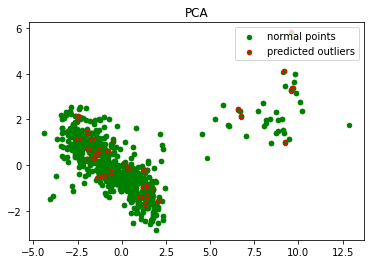

In [17]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df)
res=pd.DataFrame(pca.transform(df))
Z = np.array(res)
plt.title("PCA")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier1_index,0],res.iloc[outlier1_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns = 'PassOrFail'),df['PassOrFail'],test_size=0.3, random_state=1000)

In [19]:
Y_train.value_counts()

 1    853
-1     26
Name: PassOrFail, dtype: int64

In [20]:
Y_test.value_counts()

 1    371
-1      6
Name: PassOrFail, dtype: int64

In [21]:
Y_test.count()

377

In [22]:
Y_train.count()

879

In [23]:
Y_test.count()

377

In [24]:
X_test.count()

Injection_Time              377
Filling_Time                377
Plasticizing_Time           377
Cycle_Time                  377
Clamp_Close_Time            377
Cushion_Position            377
Plasticizing_Position       377
Max_Injection_Speed         377
Max_Injection_Pressure      377
Max_Switch_Over_Pressure    377
Max_Back_Pressure           377
Barrel_Temperature_2        377
Barrel_Temperature_3        377
Barrel_Temperature_4        377
Barrel_Temperature_5        377
Barrel_Temperature_6        377
Hopper_Temperature          377
dtype: int64

In [25]:
X_train.count()

Injection_Time              879
Filling_Time                879
Plasticizing_Time           879
Cycle_Time                  879
Clamp_Close_Time            879
Cushion_Position            879
Plasticizing_Position       879
Max_Injection_Speed         879
Max_Injection_Pressure      879
Max_Switch_Over_Pressure    879
Max_Back_Pressure           879
Barrel_Temperature_2        879
Barrel_Temperature_3        879
Barrel_Temperature_4        879
Barrel_Temperature_5        879
Barrel_Temperature_6        879
Hopper_Temperature          879
dtype: int64

In [26]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples="auto", contamination=0.02, 
                        max_features=1.0, bootstrap=True, n_jobs=-1, random_state=None)
# n_estimators를 바꿔서 노드 개수를 조정하면됨.
# 2%의 outlier 색출.(불량률 2% 기준으로 설정함.)
clf.fit(X_train)
pred = clf.predict(X_test)
X_test['anomaly']=pred
outliers=X_test.loc[X_test['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X_test['anomaly'].value_counts())


 1    366
-1     11
Name: anomaly, dtype: int64


C:\Users\82109\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_true=Y_test, y_pred=X_test['anomaly'])
print(results)

[[  2   4]
 [  9 362]]


In [28]:
confusion_matrix(Y_test,X_test['anomaly'])

array([[  2,   4],
       [  9, 362]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(Y_test, X_test['anomaly']) #정확도
print(p)
r = recall_score(Y_test, X_test['anomaly']) #정밀도
print(r)
f1 = f1_score(Y_test, X_test['anomaly']) #f1 score
print(f1)

0.9890710382513661
0.9757412398921833
0.9823609226594301


In [30]:
X_train.count()

Injection_Time              879
Filling_Time                879
Plasticizing_Time           879
Cycle_Time                  879
Clamp_Close_Time            879
Cushion_Position            879
Plasticizing_Position       879
Max_Injection_Speed         879
Max_Injection_Pressure      879
Max_Switch_Over_Pressure    879
Max_Back_Pressure           879
Barrel_Temperature_2        879
Barrel_Temperature_3        879
Barrel_Temperature_4        879
Barrel_Temperature_5        879
Barrel_Temperature_6        879
Hopper_Temperature          879
dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_true=Y_test, y_pred=X_test['anomaly'])
print(results)

[[  2   4]
 [  9 362]]


In [35]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples="auto", contamination=0.02, 
                        max_features=1.0, bootstrap=True, n_jobs=-1, random_state=None)
# n_estimators를 바꿔서 노드 개수를 조정.
# 2%의 outlier 색출.(불량률 2% 기준으로 설정함.)
clf.fit(X_train)
pred = clf.predict(X_test)
X_test['anomaly']=pred
outliers=X_test.loc[X_test['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X_test['anomaly'].value_counts())


C:\Users\82109\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\82109\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- anomaly
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but IsolationForest is expecting 17 features as input.

## confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_true=Y_test, y_pred=X_test['anomaly'])
print(results)

[[  2   4]
 [  9 362]]


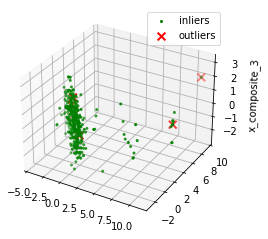

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)
pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_test)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
outliers_real=X_test.loc[Y_test['PassOrFail']==-1]
outliers_real_index=list(outliers_real.index)
ax.scatter(X_reduce[outliers_real_index,0],X_reduce[outliers_real_index,1], X_reduce[outliers_real_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

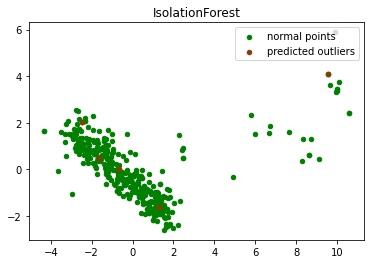

In [38]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_test)
res=pd.DataFrame(pca.transform(X_test))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outliers_real_index,0],res.iloc[outliers_real_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

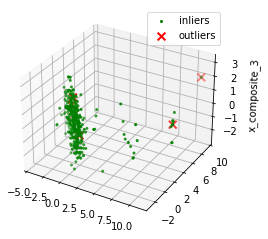

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_test)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
outliers_pred=X_test.loc[X_test['anomaly']==-1]
outliers_pred_index=list(outliers_real.index)
ax.scatter(X_reduce[outliers_pred_index,0],X_reduce[outliers_pred_index,1], X_reduce[outliers_pred_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

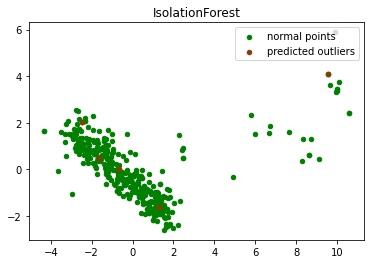

In [40]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_test)
res=pd.DataFrame(pca.transform(X_test))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outliers_pred_index,0],res.iloc[outliers_pred_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()